# Escenarios de segunda vuelta, esquivando la bala chavista

In [ ]:
objetivo: mostrar que el cucho era el más cercano para evitar la bala chavista

In [88]:
#cargar datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
tables = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Sondeos_de_intenci%C3%B3n_de_voto_para_las_elecciones_presidenciales_de_Colombia_de_2022')
all_df =  [tables[14], tables[12], tables[8].loc[21:,:]]

In [89]:
all_df_clean = []
for i, df in enumerate(all_df):
    date = pd.to_datetime(df.iloc[:,1].str[9:], format='%d-%m-%Y')
    df = df.iloc[:, 4:6]
    df = df.replace('%', '', regex=True)
    df = df.replace(',', '.', regex=True)
    for idx, column in enumerate(df.columns.values):
        if 'petro' not in str(column).lower():
            if isinstance(column, tuple):
                candidate_name = column[0]
            else:
                candidate_name = column
            column_name = column
            break
    df = df.iloc[:, idx]
    df = df.astype(float)
    df = df.to_frame()
    df['Fecha'] = date
    df['Candidato'] = candidate_name
    df.columns = ['Porcentaje', 'Fecha', 'Candidato']
    all_df_clean.append(df)
    
df_clean = pd.concat(all_df_clean)
df_clean

,Porcentaje,Fecha,Candidato
0,39.6,2022-05-20,Federico Gutiérrez
1,42.0,2022-05-19,Federico Gutiérrez
2,34.9,2022-05-19,Federico Gutiérrez
3,30.5,2022-05-18,Federico Gutiérrez
4,44.2,2022-05-18,Federico Gutiérrez
5,39.0,2022-05-13,Federico Gutiérrez
6,34.0,2022-05-07,Federico Gutiérrez
7,40.9,2022-04-29,Federico Gutiérrez
8,45.2,2022-04-27,Federico Gutiérrez
9,36.9,2022-04-21,Federico Gutiérrez


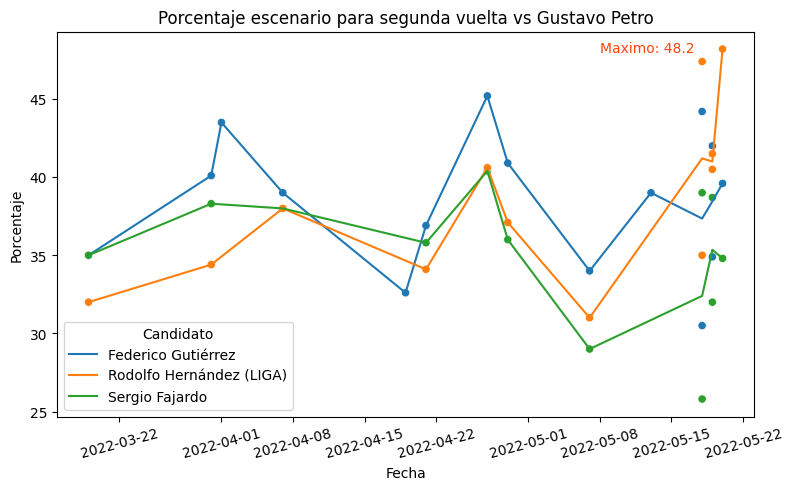

In [107]:
plt.figure(figsize=(9,5))
sns.lineplot(
    df_clean, x='Fecha', y='Porcentaje', 
    hue='Candidato', errorbar=None, hue_order=['Federico Gutiérrez', 'Rodolfo Hernández (LIGA)', 'Sergio Fajardo'])
sns.scatterplot(
    df_clean, x='Fecha', y='Porcentaje', 
    hue='Candidato', hue_order=['Federico Gutiérrez', 'Rodolfo Hernández (LIGA)', 'Sergio Fajardo'],
    legend= None)
plt.xticks(rotation=15)
plt.title('Porcentaje escenario para segunda vuelta vs Gustavo Petro')
plt.annotate('Maximo: '+str(df['Porcentaje'].max()), (dt.datetime(2022,5,8), 48), color='orangered')
plt.show()